***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

Mass is conserved. 



In [3]:
P = 1e-6
MKM1.set_rxnconditions(Pr=[0.15*P,0.8*P,0.05*P]) #CO, O2, CO2
A_covg = 0.11
B_covg = 0.33
C_covg = 0
E_covg = 1-A_covg-B_covg-C_covg
MKM1.set_initial_coverages(init=[A_covg,B_covg,C_covg,E_covg])  #CO*, O*, O2*

[mpf('0.1099999999997'),
 mpf('0.3300000000017'),
 mpf('0.0'),
 mpf('0.5599999999977')]

<IPython.core.display.Javascript object>


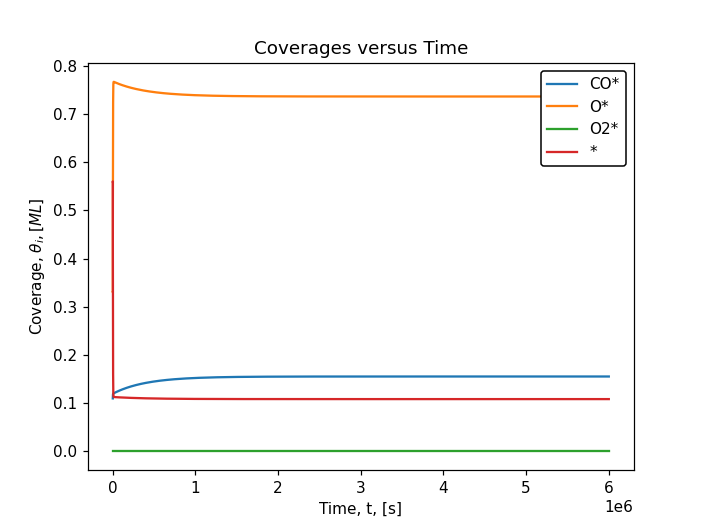

In [4]:
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [5]:
## DEBUGGING

In [3]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('Sim_NonDynamic_Data_iCovg_iRates.csv','Atomic_1.csv','Stoich_1.csv','Param_1.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[1e-6,2e-8,1e-12])
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 23.6 ms, sys: 3.14 ms, total: 26.8 ms
Wall time: 26.4 ms


In [4]:
fit.k = np.array([7.79027001e+06, 2.76471157e+03, 9.33338097e+06, 6.22390802e+00,
 9.33374875e+05, 1.55909555e+04, 3.86227078e+04, 5.32781881e+06])
print(fit.k)

[7.79027001e+06 2.76471157e+03 9.33338097e+06 6.22390802e+00
 9.33374875e+05 1.55909555e+04 3.86227078e+04 5.32781881e+06]


In [5]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',maxfev=1e6,xtol=1e-8,ftol=1e-8,plot=True) 
kfit1 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 104 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf


KeyboardInterrupt: 

### Testing Cov_func

In [ ]:
val = tuple(kfit1) #Tuple rate parameters to be used for covg_func function

In [ ]:
s = fit.covg_func(3,*val) #USING THE COVG_FUNC THAT GENERATES NORMALIZED MKMODEL DERIVED COVERAGES WHICH ARE USED TO CALUCLATE ERRORS
s = s.reshape(np.shape(covg1[:,0:])) #RESHAPING THE OUTPUTTED LONG VECTOR TO MATCH EXPECTED MATRIX 

In [ ]:
plt.figure()
plt.plot(t1,s[:,0],t1,s[:,1],t1,s[:,2],t1,s[:,3])

### Testing out normalizing results from solve_coverage

In [ ]:
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model

In [ ]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])

In [ ]:
MKM1.k = kfit1
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [ ]:
(MKM1.get_SS_rates_production(tf=None))

In [ ]:
MKM1.create_csv(k_inp=kfit1,Name='Fitted_ks_from_NON_norm_data.csv',label='rate_coeff')

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Using CURVE FIT AND MINIMIZER W/ fitted params

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fitb = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fitb.set_initial_coverages(init=[fitb.Input.iloc[0,1],fitb.Input.iloc[0,1],fitb.Input.iloc[0,1],fitb.Input.iloc[0,1]]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
fitb.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
fitb.set_limits_of_integration(fitb.Input.iloc[0,0],fitb.Input.iloc[-1,0])
fitb.n_extract = 0.5

In [ ]:
print('Fitting using fitted constants from KMC/Param file')
fitb.k = np.array([8.67173990e+06, 2.83607439e+05, 2.19775600e+06, 6.08895049e+00, 5.08887043e+06, 1.87761895e+04, 2.47715647e+06 ,4.76179797e+07])
t_b,covg_b,fits_b = fitb.fitting_rate_param(option='cf',gtol=1e-18,ftol=1e-18,tol=1e-18,maxiter=1e7,maxfun=1e7,plot=True) #min stands for minimize

In [ ]:
t_b2,covg_b2,fits_b2 = fitb.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-18,ftol=1e-18,tol=1e-18,maxiter=1e7,maxfun=1e7,plot=True) #min stands for minimize

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Perfroming Fitting of rate parameters

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit.k  #Resetting the rate constants used in MK model for fitting
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',plot=True) #cf stands for curve fit
kfit1 = fit.fitted_k

In [ ]:
print(kfit1)

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b_b = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit1_b_b.k = kfit1
t1_b_b,covg1_b_b,fits1_b_b = fit1_b_b.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-12,ftol=1e-8,tol=1e-8,maxiter=1e4,maxfun=1e4,plot_norm=True) #min stands for minimize

In [ ]:
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

In [ ]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])

In [ ]:
MKM1.k = kfit1

In [ ]:
print((kfit1))

In [ ]:
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [ ]:
print(MKM1.k)

In [ ]:
print(MKM1.kextract())
MKM1.k = MKM1.kextract()

In [ ]:
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

### WITH CD (CF)

In [ ]:
%%time 
#Fitting for Model 1: (with CD) #using curve_fit
fit1 = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit1.set_limits_of_integration(fit1.Input.iloc[0,0],fit1.Input.iloc[-1,0])
fit1.rate_const_correction = 'Forced_exp_CD'
fit1.n_extract = 0.5

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit1.k  #Resetting the rate constants used in MK model for fitting
t2,covg2,fits2 = fit1.fitting_rate_param(option='cf',maxfev=1e5,xtol=1e-12,ftol=1e-12,plot=True) #cf stands for curve fit
kfit2 = fit1.fitted_k

In [ ]:
print(fit1.MKM.rate_const_correction)

## MINIMIZER

In [ ]:
%%time
fit.k = kfit1 #Resetting the rate constants used in MK model for fitting to those fitted in curve fit
t2,covg2,fits2 = fit.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-5,ftol=1e-5,maxfun=1e5,maxiter=1e5,plot=True) #cf stands for curve fit

### WITH CD (Min)

In [ ]:
%%time
fit1.k = kfit1 #Resetting the rate constants used in MK model for fitting to those fitted in curve fit
t21,covg21,fits21 = fit1.fitting_rate_param(option='min',method_min='L-BFGS-B',gtol=1e-8,ftol=1e-8,maxfun=1e5,maxiter=1e5,plot=True) #cf stands for curve fit